<a href="https://colab.research.google.com/github/bdp2732/23112/blob/main/Ising_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
!pip install tensorflow-addons

In [82]:
!pip install pillow
import numpy as np
import decimal
from decimal import Decimal as dec
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.pyplot as plt
import os, sys
from scipy.signal import find_peaks
from scipy import io
import scipy.io.wavfile
from scipy.io.wavfile import write
from numpy.fft import fft
import math
from math import exp, sqrt
import librosa
import librosa.display
import IPython.display as ipd
import random
from random import randint
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential,datasets
from tensorflow.keras.models import Model
from tensorflow.keras.layers.experimental import preprocessing
from keras import backend as K
from keras.callbacks import ModelCheckpoint
import os
from tqdm import tqdm
import operator
from functools import reduce
from tensorflow.keras.layers import *
from tensorflow_addons.optimizers import AdamW
from tensorflow_addons.optimizers import AdamW, RectifiedAdam

In [63]:
decimal.getcontext().prec = 500

In [64]:
nmax1 = 100000
nmax2 = 15
kb = dec(8617343) * (dec(10) ** dec(-11))
T = dec(10**100)
exp = lambda x: (dec(-x)/(kb * T)).exp()
E = []
Ea = []
array_2D = np.ones([nmax2, nmax2])
array_2D1 = array_2D.copy()

In [65]:
for i in range(nmax1):
  a = np.random.randint(nmax2)
  b = np.random.randint(nmax2)
  array_2D1[a,b] = array_2D[a,b]*-1
  #print(array_2D)
  #print(array_2D1)
  #print(np.array_equal(array_2D, array_2D1))
  multisum = lambda x, y: np.multiply(x[:-1, :-1], y).sum()
  link = lambda x: -(multisum(x, x[:-1, 1:]) + multisum(x, x[1:, :-1]))
  E1 = link(array_2D)
  E.append(E1)
  E2 = link(array_2D1)
  Ea.append(E2)
  #print(E1)
  #print(E2)
  dE = E2-E1
  #print(dE)
  if dE <= 0 or np.random.random() < exp(dE):
    array_2D = array_2D1.copy()
  else:
    array_2D1 = array_2D.copy()
print(array_2D)

[[ 1. -1. -1.  1.  1.  1. -1. -1.  1. -1.  1.  1. -1. -1. -1.]
 [-1.  1. -1.  1.  1.  1. -1. -1. -1. -1. -1. -1.  1.  1. -1.]
 [-1.  1.  1.  1. -1. -1. -1. -1. -1. -1.  1. -1. -1.  1.  1.]
 [ 1.  1. -1.  1.  1.  1. -1.  1.  1. -1. -1. -1. -1. -1. -1.]
 [ 1. -1.  1.  1. -1. -1.  1. -1. -1.  1.  1.  1. -1. -1. -1.]
 [-1.  1. -1.  1. -1. -1. -1. -1.  1. -1. -1. -1.  1. -1. -1.]
 [ 1. -1. -1.  1. -1. -1.  1. -1.  1. -1. -1.  1. -1.  1. -1.]
 [-1.  1. -1. -1. -1.  1. -1. -1. -1.  1.  1.  1. -1. -1.  1.]
 [-1.  1.  1. -1. -1.  1. -1.  1. -1.  1. -1. -1. -1. -1.  1.]
 [ 1. -1. -1.  1. -1. -1.  1. -1. -1.  1.  1. -1.  1.  1.  1.]
 [ 1. -1.  1. -1.  1.  1.  1. -1. -1. -1.  1.  1.  1. -1. -1.]
 [-1. -1. -1.  1. -1. -1.  1. -1. -1. -1. -1.  1. -1.  1.  1.]
 [ 1. -1. -1. -1.  1. -1.  1.  1.  1.  1. -1.  1.  1. -1. -1.]
 [ 1. -1. -1.  1. -1. -1.  1. -1.  1.  1.  1. -1.  1. -1.  1.]
 [ 1. -1.  1. -1.  1. -1.  1. -1.  1.  1.  1. -1. -1.  1.  1.]]


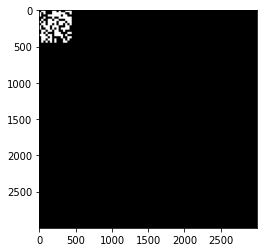

In [66]:
im2 = Image.new("RGB", (3000,3000))
im3 = Image.new("RGB", (30,30),(255, 255, 255))
for i in range(len(array_2D)):
    for j in range(len(array_2D[0])):
        if array_2D[i, j] == -1:
            im2.paste(im3, (30*j,30*i,30*(j+1),30*(i+1)))
im2.save("paste_result.jpg")
plt.imshow(im2)

In [67]:
l_data=100
LT = np.zeros([l_data,nmax2, nmax2]) 
ET = np.zeros([l_data,nmax2, nmax2]) 
HT = np.zeros([l_data,nmax2, nmax2]) 

dT=20
T1=[]
T2=[]
T3=[]
for i in range(l_data):
  T1.append(20+20*i)
  T2.append(29020+20*i)
  T3.append(10**10+20*i)
array_2D = np.ones([nmax2, nmax2])
array_2D1 = array_2D.copy()

In [68]:
multisum = lambda x, y: np.multiply(x[:-1, :-1], y).sum()
link = lambda x: -(multisum(x, x[:-1, 1:]) + multisum(x, x[1:, :-1]))
for j in range(l_data):
  T=dec(20+20*j)
  exp = lambda x: (dec(-x)/(kb * T)).exp()
  for i in range(5000):

    a = np.random.randint(nmax2)
    b = np.random.randint(nmax2)
    array_2D1[a,b] = array_2D[a,b]*-1
    E1 = link(array_2D)
    E.append(E1)
    E2 = link(array_2D1)
    Ea.append(E2)
    dE = E2-E1
    if dE < 0 or np.random.random() < exp(dE):
      array_2D = array_2D1.copy()
    else:
      array_2D1 = array_2D.copy()
  LT[j]=array_2D
  print(array_2D)

[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]
[[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  

In [69]:

array_2D = np.ones([nmax2, nmax2])
array_2D1 = array_2D.copy()
for j in range(l_data):
  T=dec(29020+20*j)
  exp = lambda x: (dec(-x)/(kb * T)).exp()
  for i in range(5000):

    a = np.random.randint(nmax2)
    b = np.random.randint(nmax2)
    array_2D1[a,b] = array_2D[a,b]*-1
    E1 = link(array_2D)
    E.append(E1)
    E2 = link(array_2D1)
    Ea.append(E2)
    dE = E2-E1
    if dE < 0 or np.random.random() < exp(dE):
      array_2D = array_2D1.copy()
    else:
      array_2D1 = array_2D.copy()
  ET[j]=array_2D
  print(array_2D)

[[ 1. -1. -1. -1. -1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1. -1. -1. -1. -1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [-1. -1. -1. -1. -1. -1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [-1. -1.  1. -1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [-1. -1.  1.  1.  1.  1.  1.  1.  1.  1. -1.  1.  1.  1.  1.]
 [-1. -1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1. -1.  1.  1.  1. -1.  1.  1.  1.  1. -1. -1.]
 [-1.  1.  1.  1.  1.  1.  1.  1. -1.  1.  1. -1. -1. -1. -1.]
 [-1.  1.  1.  1.  1.  1.  1.  1.  1.  1. -1. -1. -1. -1. -1.]
 [-1. -1.  1.  1.  1.  1.  1.  1.  1.  1.  1. -1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. -1. -1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1. -1.  1.  1.  1. -1.  1.  1. -1.]
 [ 1. -1. -1. -1. -1.  1.  1. -1. -1.  1.  1.  1.  1.  1.  1.]
 [ 1. -1.  1. -1. -1. -1.  1. -1. -1. -1. -1. -1.  1. -1. -1.]]
[[-1. -1. -1.  1. -1. -1. -1. -1. -1.  1.  1.  1.  1. 

In [70]:

array_2D = np.ones([nmax2, nmax2])
array_2D1 = array_2D.copy()
for j in range(l_data):
  T=dec(10**10+20*j)
  exp = lambda x: (dec(-x)/(kb * T)).exp()
  for i in range(5000):

    a = np.random.randint(nmax2)
    b = np.random.randint(nmax2)
    array_2D1[a,b] = array_2D[a,b]*-1
    E1 = link(array_2D)
    E.append(E1)
    E2 = link(array_2D1)
    Ea.append(E2)
    dE = E2-E1
    if dE < 0 or np.random.random() < exp(dE):
      array_2D = array_2D1.copy()
    else:
      array_2D1 = array_2D.copy()
  HT[j]=array_2D
  print(array_2D)

[[-1.  1.  1.  1. -1.  1. -1.  1.  1. -1. -1. -1. -1.  1.  1.]
 [ 1. -1. -1.  1. -1. -1.  1. -1. -1. -1.  1. -1. -1.  1.  1.]
 [ 1. -1. -1.  1. -1. -1.  1.  1. -1.  1. -1. -1. -1. -1. -1.]
 [ 1. -1. -1. -1.  1.  1. -1. -1.  1. -1. -1. -1.  1. -1.  1.]
 [-1.  1.  1.  1.  1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  1.]
 [ 1.  1.  1.  1. -1. -1.  1. -1.  1. -1. -1. -1.  1.  1. -1.]
 [-1.  1. -1.  1.  1. -1. -1.  1. -1. -1.  1. -1. -1.  1. -1.]
 [ 1. -1.  1.  1. -1.  1.  1.  1. -1.  1.  1.  1. -1.  1.  1.]
 [-1. -1. -1. -1.  1.  1. -1. -1.  1.  1.  1. -1.  1.  1. -1.]
 [-1. -1. -1.  1. -1. -1.  1.  1. -1. -1. -1.  1.  1.  1.  1.]
 [-1.  1. -1.  1.  1. -1. -1.  1. -1.  1. -1.  1. -1. -1. -1.]
 [-1.  1. -1.  1. -1. -1. -1. -1.  1. -1.  1. -1.  1.  1. -1.]
 [ 1. -1. -1.  1.  1. -1. -1.  1. -1. -1.  1.  1.  1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1.  1. -1. -1. -1.  1.  1.  1. -1.]
 [ 1. -1.  1.  1.  1.  1. -1.  1. -1.  1. -1. -1.  1. -1.  1.]]
[[ 1. -1.  1. -1. -1.  1. -1. -1.  1. -1. -1.  1. -1. 

In [109]:
trsc = int(0.8*len(LT)) # 전체 데이터 중 80퍼센트의 데이터 (training scale)
tesc = int(0.2*len(LT)) # 전체 데이터 중 20퍼센트의 데이터 (test scale)

In [110]:
labelMake = lambda x: tf.one_hot(np.array([list(np.zeros(x)+i) for i in range(3)]).flatten(), depth=3)

In [111]:
train_label = labelMake(trsc)
test_label = labelMake(tesc)

In [112]:
tr_data = np.concatenate((LT[:trsc],ET[:trsc],
                             HT[:trsc]), axis = 0)
tes_data = np.concatenate((LT[trsc:],ET[trsc:],
                             HT[trsc:]), axis = 0)

In [113]:
class CastToFloat32(Layer):

  def __init__(self, **kwargs):
    super(CastToFloat32, self).__init__(**kwargs)
  
  def build(self, input_shape):
    super(CastToFloat32, self).build(input_shape)
  
  def call(self, x):
    return K.cast(x, dtype=tf.float32)
  
  def compute_output_shape(self, input_shape):
    return (input_shape[0], )

model = tf.keras.Sequential([
  Input(shape=(15,15,1)),
  CastToFloat32(),
  preprocessing.Normalization(),
  Conv2D(4, 3),
  PReLU(),
  Conv2D(8, 3),
  PReLU(),
  MaxPooling2D(strides=(2,2)),
  Dropout(0.25),
  Flatten(),
  Dropout(0.5),
  Dense(3, activation="linear"),
  Softmax()
])


model.compile(optimizer = RectifiedAdam(learning_rate=0.0001),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
cast_to_float32_7 (CastToFlo (None, 15, 15, 1)         0         
_________________________________________________________________
normalization_7 (Normalizati (None, 15, 15, 1)         3         
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 13, 13, 4)         40        
_________________________________________________________________
p_re_lu_62 (PReLU)           (None, 13, 13, 4)         676       
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 11, 11, 8)         296       
_________________________________________________________________
p_re_lu_63 (PReLU)           (None, 11, 11, 8)         968       
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 5, 5, 8)         

In [114]:
result = model.fit(tr_data, train_label, epochs = 500)

Epoch 1/500
8/8 [==============================] - 2s 7ms/step - loss: 1.3910 - accuracy: 0.3417
Epoch 2/500
8/8 [==============================] - 0s 6ms/step - loss: 1.3966 - accuracy: 0.3375
Epoch 3/500
8/8 [==============================] - 0s 7ms/step - loss: 1.3767 - accuracy: 0.3917
Epoch 4/500
8/8 [==============================] - 0s 6ms/step - loss: 1.4033 - accuracy: 0.3667
Epoch 5/500
8/8 [==============================] - 0s 6ms/step - loss: 1.5202 - accuracy: 0.3000
Epoch 6/500
8/8 [==============================] - 0s 6ms/step - loss: 1.3701 - accuracy: 0.3417
Epoch 7/500
8/8 [==============================] - 0s 7ms/step - loss: 1.4166 - accuracy: 0.2583
Epoch 8/500
8/8 [==============================] - 0s 6ms/step - loss: 1.4286 - accuracy: 0.3292
Epoch 9/500
8/8 [==============================] - 0s 9ms/step - loss: 1.4630 - accuracy: 0.2750
Epoch 10/500
8/8 [==============================] - 0s 6ms/step - loss: 1.4400 - accuracy: 0.2875
Epoch 11/500
8/8 [===========

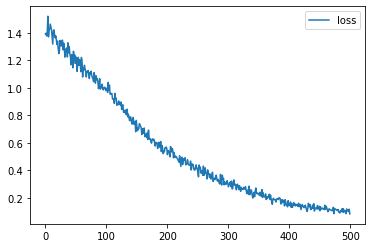

In [115]:
metrics = result.history
plt.plot(result.epoch, metrics['loss'])
plt.legend(['loss'])
plt.show()